In [1]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

from keras.models import Sequential
from keras.layers import Dense

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


### Random Basis Function

In [2]:
M = 100
Rm = 2

weights = np.zeros(M)
biases = np.zeros(M)

for i in range(M):
    weights[i] = np.random.uniform(low=-Rm, high=Rm)
    biases[i] = np.random.uniform(low=-0.0005, high=0.0005)

def phi(x):
    out = np.zeros((np.shape(x)[0],M))
    for j in range(np.shape(x)[0]):
        for i in range(M):
            out[j][i] = tf.sin(weights[i]*x[j] + biases[i])
    return out

train = np.linspace(-1, 1, 20)
test = np.linspace(-1, 1, 7)

phi_train = phi(train)
phi_test = phi(test)

def func(x):
    return np.sin(np.pi * x)
    
y_train = func(train)
y_test = func(test)

In [3]:
model = Sequential()

model.add(Dense(1, input_dim=M))
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', 
                metrics=[tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),'accuracy'])

history = model.fit(phi_train, y_train, validation_data = (phi_test,y_test), epochs=2000, batch_size=64)

Epoch 1/2000
1/1 [==============================] - 1s 573ms/step - loss: 0.7722 - mean_absolute_error: 0.8018 - accuracy: 0.0000e+00 - val_loss: 0.6245 - val_mean_absolute_error: 0.6478 - val_accuracy: 0.1429
Epoch 2/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6990 - mean_absolute_error: 0.7570 - accuracy: 0.0000e+00 - val_loss: 0.5643 - val_mean_absolute_error: 0.6012 - val_accuracy: 0.1429
Epoch 3/2000
1/1 [==============================] - 0s 34ms/step - loss: 0.6308 - mean_absolute_error: 0.7123 - accuracy: 0.0000e+00 - val_loss: 0.5098 - val_mean_absolute_error: 0.5550 - val_accuracy: 0.1429
Epoch 4/2000
1/1 [==============================] - 0s 37ms/step - loss: 0.5679 - mean_absolute_error: 0.6677 - accuracy: 0.0000e+00 - val_loss: 0.4609 - val_mean_absolute_error: 0.5175 - val_accuracy: 0.1429
Epoch 5/2000
1/1 [==============================] - 0s 44ms/step - loss: 0.5102 - mean_absolute_error: 0.6264 - accuracy: 0.0000e+00 - val_loss: 0.4177 - val_mean_

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


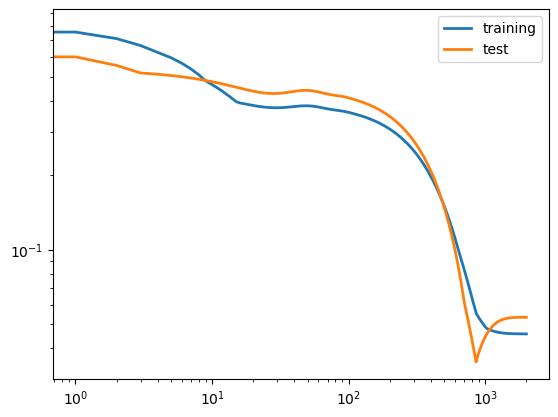

4/4 [==============================] - 0s 2ms/step


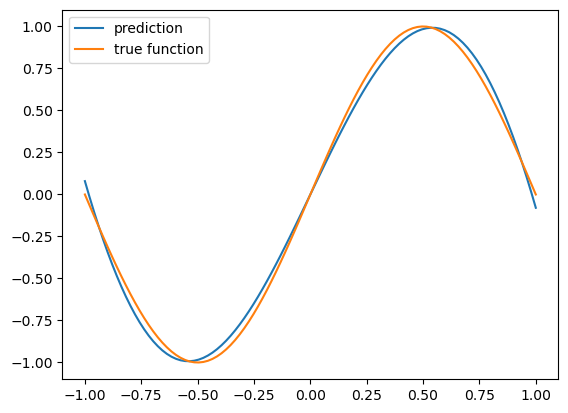

In [4]:
print(model.summary())
bc     = history.history['mean_absolute_error']
bc_val     = history.history['val_mean_absolute_error']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2, label='training')
plt.loglog(range(np.shape(bc_val)[0]),bc_val, linewidth=2, label='test')
plt.legend()
plt.show()

val = np.linspace(-1, 1, 100)
phi_val = phi(val)
y_pred = model.predict(phi_val)
plt.plot(val, y_pred, label='prediction')
plt.plot(val, func(val), label='true function')
plt.legend()

### PINN

In [1]:
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

from keras.models import Sequential
from keras.layers import Dense

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [18]:
'''import tensorflow
x = np.linspace(0, 1, 10)
y = tf.sin(np.pi*x)

w1 = tensorflow.Variable(x)

with tensorflow.GradientTape(persistent=True) as tape:
    z = tensorflow.sin(np.pi*w1)
gradients = tape.gradient(z, w1)

gradients_2 = tape.gradient(gradients, w1)
print(gradients_2)'''

None


In [29]:
h = (x[-1] - x[0])/len(x)
print(h)
dy = np.zeros(len(x))
for i in range(1,len(x)-1):
    dy[i] = (y[i+1] -2*y[i] + y[i-1])/h**2
    
print(dy)

print((dy - f(x))**2)

0.1
[  0.          -4.1252677   -7.75296723 -10.44554449 -11.87823492
 -11.87823492 -10.44554449  -7.75296723  -4.1252677    0.        ]
tf.Tensor(
[0.00000000e+00 5.62630689e+01 1.98726160e+02 3.60729210e+02
 4.66469192e+02 4.66469192e+02 3.60729210e+02 1.98726160e+02
 5.62630689e+01 1.46090237e-30], shape=(10,), dtype=float64)


In [36]:
M = 100
Rm = 2

weights = np.zeros(M)
biases = np.zeros(M)

for i in range(M):
    weights[i] = np.random.uniform(low=-Rm, high=Rm)
    biases[i] = np.random.uniform(low=-0.0005, high=0.0005)

def phi(x):
    out = np.zeros((np.shape(x)[0],M))
    for j in range(np.shape(x)[0]):
        for i in range(M):
            out[j][i] = tf.sin(weights[i]*x[j] + biases[i])
    return out

train = np.linspace(-1, 1, 20)
test = np.linspace(-1, 1, 7)

phi_train = phi(train)
phi_test = phi(test)

def func(x):
    return np.sin(np.pi * x)
    
y_train = func(train)
y_test = func(test)

def func_real(x):
    return np.sin(np.pi*x)

def f(x):
    return np.pi ** 2 * np.sin(np.pi * x)

def train_loss(y_true, y_pred):
    x = np.zeros(4)
    if len(y_pred) == len(train):
        x = train
    else:
        x = test
    dy = np.zeros(len(x), dtype=object)
    for i in range(1,len(x)-1):
        dy[i] = (y_pred[i+1] - 2*y_pred[i] + y_pred[i-1])/h**2
    loss = np.sum((dy - f(x))**2)
    loss += (y_pred[0] - func_real(x[0]))**2 + (y_pred[-1] - func_real(x[-1]))**2

    return loss


In [37]:
model = Sequential()

model.add(Dense(1, input_dim=M))
model.compile(loss=train_loss, optimizer='adam', 
                metrics=[tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),'accuracy'])

history = model.fit(phi_train, y_train, validation_data = (phi_test,y_test), epochs=2000, batch_size=64)

Epoch 1/2000


TypeError: in user code:

    File "c:\Users\Marco\anaconda3\envs\pagani\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Marco\AppData\Local\Temp\ipykernel_16436\915166443.py", line 42, in train_loss  *
        dy = np.zeros(len(x), dtype=object)

    TypeError: expected a sequence of integers or a single integer, got '<tf.Tensor 'train_loss/strided_slice_1:0' shape=() dtype=int32>'
